# 🐴 **AlexNet for the Horse2ZebraDataset** 🦓

##**Q1. Implement the AlexNet architecture**

####**Train, test and report the performance of this model on the Horse2ZebraDataset**

#####**Importing Libraries:**

In [ ]:
import tensorflow as tf
from keras.layers import ZeroPadding2D
from keras.layers import BatchNormalization
from google.colab import files
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation

Fetching data from kaggle using an API:

In [ ]:
!pip install -q kaggle

In [ ]:
!pip install tensorflow==2.8.2 !apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --allow-change-held-packages


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"geenotgee","key":"619a0d680008e42702372bd3cac5065a"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d balraj98/horse2zebra-dataset

100% 111M/111M [00:00<00:00, 283MB/s] 
100% 111M/111M [00:00<00:00, 274MB/s]


In [ ]:
! unzip horse2zebra-dataset.zip

Archive:  horse2zebra-dataset.zip
  inflating: metadata.csv            
  inflating: testA/n02381460_1000.jpg  
  inflating: testA/n02381460_1010.jpg  
  inflating: testA/n02381460_1030.jpg  
  inflating: testA/n02381460_1090.jpg  
  inflating: testA/n02381460_1100.jpg  
  inflating: testA/n02381460_1110.jpg  
  inflating: testA/n02381460_1120.jpg  
  inflating: testA/n02381460_1160.jpg  
  inflating: testA/n02381460_120.jpg  
  inflating: testA/n02381460_1210.jpg  
  inflating: testA/n02381460_1260.jpg  
  inflating: testA/n02381460_1300.jpg  
  inflating: testA/n02381460_1350.jpg  
  inflating: testA/n02381460_1360.jpg  
  inflating: testA/n02381460_140.jpg  
  inflating: testA/n02381460_1420.jpg  
  inflating: testA/n02381460_1540.jpg  
  inflating: testA/n02381460_1620.jpg  
  inflating: testA/n02381460_1630.jpg  
  inflating: testA/n02381460_1660.jpg  
  inflating: testA/n02381460_1690.jpg  
  inflating: testA/n02381460_1740.jpg  
  inflating: testA/n02381460_1750.jpg  
  inflatin

In [ ]:
import pandas as pd
df = pd.read_csv('metadata.csv')
df.head()

,image_id,domain,split,image_path
0,n02381460_1000,B (Zebra),test,testB/n02381460_1000.jpg
1,n02381460_1001,A (Horse),train,trainA/n02381460_1001.jpg
2,n02381460_1002,A (Horse),train,trainA/n02381460_1002.jpg
3,n02381460_1003,A (Horse),train,trainA/n02381460_1003.jpg
4,n02381460_1006,A (Horse),train,trainA/n02381460_1006.jpg


* A = Horse Data
* B = Zebra Data

#####**Preprocessing the Data:**

In [ ]:
import os
import shutil

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In order for ImageDataGenerator to work, our classes must be present as subfolderswithin the actual testing and training sets. Manually do the following:
* Create two folders, "test" and "train"
* Move "testA" and "testB" under "test"
* Move "trainA" and "trainB" under "train"


**But still only provide the paths of "test" and "train"

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rotation_range=15,
                                       rescale=1./255,
                                       shear_range=0.1,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       width_shift_range=0.1,
                                       height_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/test',  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224 (size of input used to train pre-trained model)
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')


Found 260 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 20 using val_datagen generator
test_generator = test_datagen.flow_from_directory(
        '/content/train',
        target_size=(227, 227),
        batch_size=10,
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [ ]:
print('total training horse images:', len(os.listdir('/content/test/testA')))
print('total training zebra images:', len(os.listdir('/content/test/testB')))
print('total validation horse images:', len(os.listdir('/content/train/trainA')))
print('total validation zebra images:', len(os.listdir('/content/train/trainB')))

total training horse images: 120
total training zebra images: 140
total validation horse images: 1067
total validation zebra images: 1334


#####**Creating the Alexnet:**

In [ ]:
model = tf.keras.models.Sequential()

model.add(Conv2D(filters=96, kernel_size=(11, 11),strides=(4,4), padding='valid', input_shape=(227, 227, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())
    
model.add(Conv2D(filters=256, strides=(1, 1), kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())
    
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
    
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
    
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid'))
    
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='sigmoid'))



Compiling the Alexnet:

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

Fitting the model:

Due to the limited amount of data, chosen values for steps and number of epochs are small:

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,  # 2400 images = batch_size(10) * steps
      epochs=10,
      validation_data=test_generator,
      validation_steps=5)  # 260 images = batch_size(10) * steps

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
20/20 [==============================] - 24s 1s/step - loss: 1.6400 - accuracy: 0.4850 - val_loss: 0.6928 - val_accuracy: 0.6800
Epoch 2/10
20/20 [==============================] - 23s 1s/step - loss: 0.6933 - accuracy: 0.5550 - val_loss: 0.6936 - val_accuracy: 0.5200
Epoch 3/10
20/20 [==============================] - 21s 1s/step - loss: 0.6866 - accuracy: 0.5600 - val_loss: 0.6947 - val_accuracy: 0.5200
Epoch 4/10
20/20 [==============================] - 21s 1s/step - loss: 0.6915 - accuracy: 0.5350 - val_loss: 0.6937 - val_accuracy: 0.5200
Epoch 5/10
20/20 [==============================] - 22s 1s/step - loss: 0.6894 - accuracy: 0.5450 - val_loss: 0.6734 - val_accuracy: 0.6400
Epoch 6/10
20/20 [==============================] - 21s 1s/step - loss: 0.6909 - accuracy: 0.5500 - val_loss: 0.6736 - val_accuracy: 0.6600
Epoch 7/10
20/20 [==============================] - 22s 1s/step - loss: 0.6890 - accuracy: 0.5600 - val_loss: 0.6687 - val_accuracy: 0.6400
Epoch 8/10
20/20 [==

A visual representation of the AlexNet:

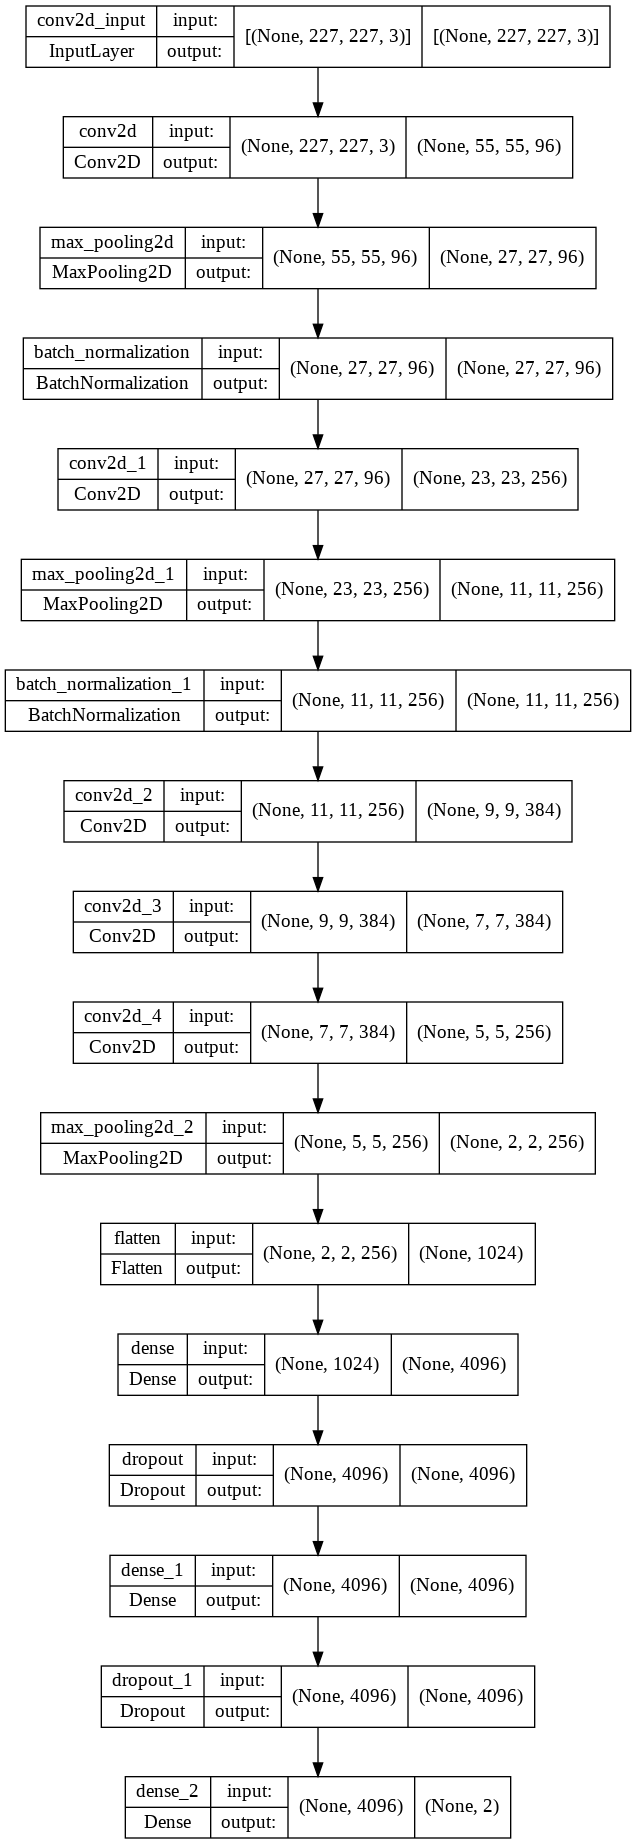

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

#####**Plotting the Performance:**

In [ ]:
from matplotlib import pyplot as plt

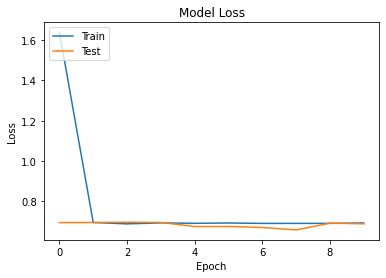

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

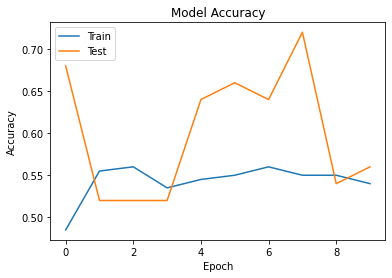

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

While testing loss does not change much throughout the epochs, the testing accuracy does increase throughout the epochs, peaking at 7 epochs. Beyond 7 peochs may be considered overfitting.